# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_df = pd.merge(mouse_metadata, study_results, on = ["Mouse ID"])


# Display the data table for preview
study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
study_df["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = study_df.loc[study_df.duplicated(subset= ['Mouse ID', 'Timepoint']),:]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_show = study_df.loc[study_df["Mouse ID"] == "g989", :]
duplicate_show


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_df = study_df[study_df["Mouse ID"]!= "g989"]

In [6]:
# Checking the number of mice in the clean DataFrame.
study_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = study_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_median = study_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_std= study_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_variance = study_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_sem = study_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.
summary_table = pd.DataFrame({
    "Mean Tumor Volume":tumor_mean,
    "Median Tumor Volume":tumor_median,
    "Tumor Volume Variance": tumor_variance,
    "Tumor Volume Std. Dev.":tumor_std,
    "Tumor Volume Std. Err.":tumor_sem
})
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
study_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

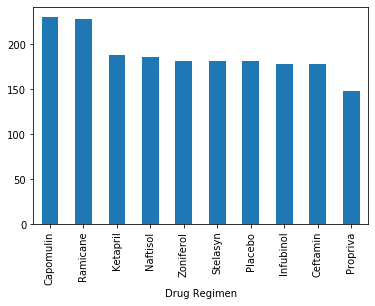

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
time_point = study_df.groupby(["Drug Regimen"]).count()["Timepoint"].sort_values(ascending= False)
time_point.plot(kind="bar")
plt.show()


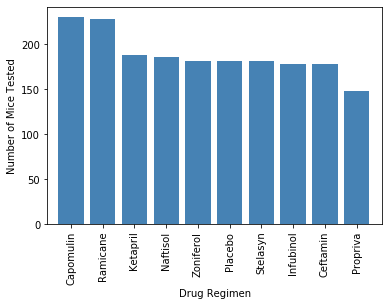

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x = study_df["Drug Regimen"].value_counts()

plt.figure(figsize=(6,4))
plt.xlim(-0.75,9.8)
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.bar(x.index.values, x.values, color='steelblue', align="center")

plt.show()

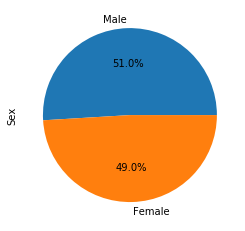

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = study_df["Sex"].value_counts()
sex.plot(kind = "pie", autopct= "%1.1f%%")
plt.show()

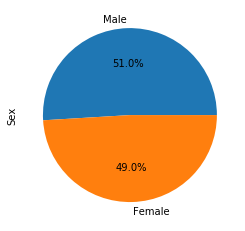

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = study_df["Sex"].value_counts()
pie_label = ["Male", "Female"]
plt.ylabel("Sex")
plt.pie(sex, labels= pie_label, autopct= "%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
drug_filter = study_df.loc[study_df['Drug Regimen'].isin(drugs)]
drug_filter 

max_time_df = pd.DataFrame(drug_filter.groupby(["Mouse ID"]).max()["Timepoint"])
max_time_df = max_time_df.reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
drug_study_df = pd.merge(study_df, max_time_df, on = ["Mouse ID"], how = "right")
drug_study_df = drug_study_df.rename(columns={"Timepoint_y": "Final Timepoint", "Timepoint_x": "Timepoint"})
drug_study_df[drug_study_df['Drug Regimen'] == 'Capomulin']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Final Timepoint
10,s185,Capomulin,Female,3,17,0,45.000000,0,45
11,s185,Capomulin,Female,3,17,5,43.878496,0,45
12,s185,Capomulin,Female,3,17,10,37.614948,0,45
13,s185,Capomulin,Female,3,17,15,38.177232,0,45
14,s185,Capomulin,Female,3,17,20,36.866876,0,45
...,...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1,45
702,r157,Capomulin,Male,22,25,0,45.000000,0,15
703,r157,Capomulin,Male,22,25,5,45.597064,0,15
704,r157,Capomulin,Male,22,25,10,46.059608,0,15


In [27]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []
final_tumorvol = drug_study_df[drug_study_df['Timepoint'] == drug_study_df['Final Timepoint']][['Drug Regimen', 'Tumor Volume (mm3)']]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
data = drug_study_df.groupby(["Drug Regimen"])['Tumor Volume (mm3)']
quartiles = data.quantile([.25,.5,.75])
for drug in drugs:
    drug_quartile = quartiles[drug]
    lowerq = drug_quartile[0.25]
    upperq = drug_quartile[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"{drug} Results")
    print(f"The interquartile range for {drug} is: {round(iqr, 2)}")
    
    df = data.get_group(drug)
    print(df.loc[(df >= upper_bound )| (df <= lower_bound)])

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume.append(drug_study_df['Tumor Volume (mm3)'])    
    
    # Determine outliers using upper and lower bounds
    # print(f"{drug}'s potential outliers{upper_bound}")
    print(f"Values below {round(lower_bound, 2)} mm3 could be outliers.")
    print(f"Values above {round(upper_bound, 2)} mm3 could be outliers.\n")
    

Capomulin Results
The interquartile range for Capomulin is: 7.31
18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Values below 26.71 mm3 could be outliers.
Values above 55.97 mm3 could be outliers.

Ramicane Results
The interquartile range for Ramicane is: 8.33
9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Values below 24.19 mm3 could be outliers.
Values above 57.49 mm3 could be outliers.

Infubinol Results
The interquartile range for Infubinol is: 10.0
Series([], Name: Tumor Volume (mm3), dtype: float64)
Values below 32.31 mm3 could be outliers.
Values above 72.32 mm3 could be outliers.

Ceftamin Results
The interquartile range for Ceftamin is: 9.59
Series([], Name: Tumor Volume (mm3), dtype: float64)
Values below 32.82 mm3 could be outliers.
Values above 71.19 mm3 could be outliers.



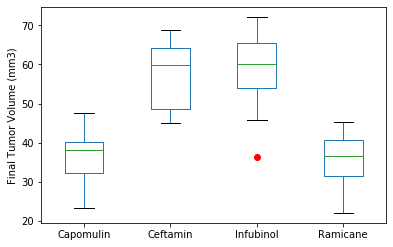

In [15]:
final_tumorvol = drug_study_df[drug_study_df['Timepoint'] == drug_study_df['Final Timepoint']][['Drug Regimen', 'Tumor Volume (mm3)']]
boxplot = final_tumorvol.boxplot(column='Tumor Volume (mm3)', by = 'Drug Regimen', sym='r')

plt.suptitle('')
plt.title('')
plt.xlabel('')
plt.grid(False)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()



## Line and Scatter Plots

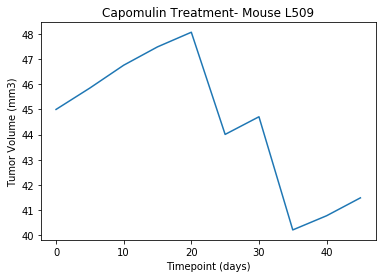

In [25]:
df = drug_study_df[drug_study_df['Mouse ID'] == 'l509']

df.plot(kind = "line", x="Timepoint", y = "Tumor Volume (mm3)", legend= False)

# labels
plt.title('Capomulin Treatment- Mouse L509')
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.show()

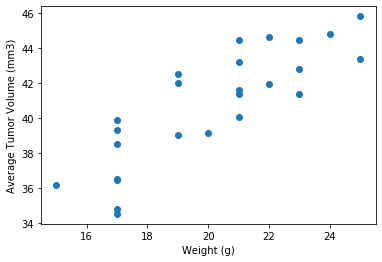

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
df_capomulin = drug_study_df[drug_study_df['Drug Regimen'] == 'Capomulin']
scatter_data = df_capomulin.groupby(['Mouse ID']).mean()

plt.scatter(scatter_data['Weight (g)'],scatter_data['Tumor Volume (mm3)'])

# labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


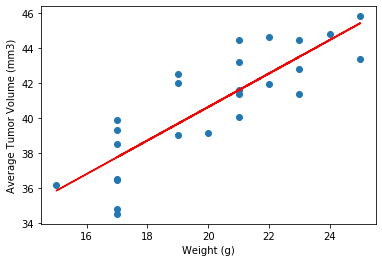

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = scatter_data['Weight (g)']
y_values = scatter_data['Tumor Volume (mm3)']

# linregress
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue, 2)}")

# scatterplot and line
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

# labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

